In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import colors
from time import time
from tqdm import tqdm

from util import decode_npy

In [90]:
# relevant constants
DF = pd.read_csv('../data/main_table.csv')
DF = DF.loc[DF.q_median.notnull()]
FIGURE_PATH = '../figures'

Q_MEDIAN_COLNAME = 'q_median'
Q_MEAN_COLNAME = 'q_mean'
SGQ_COLNAME = 'q_rrms'
Q_STD_COLNAME = 'q_std'
R_MAG_COLNAME = 'psfMag_r'

C_ORANGE  = '#e69f00'
C_BLUE    = '#56b4e9'
C_GREEN   = '#009e73'
C_BLACK   = '#000000'

MIN_Q, MAX_Q = 0, 2
MIN_SGQ, MAX_SGQ = 0, 0.5
S = 40

In [7]:
# plot fontsize settings

SMALL_FONT_SIZE = 22
MEDIUM_FONT_SIZE = 28
LARGE_FONT_SIZE = 28

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [5]:
is_nonvar = DF.nonvar_match_num == 1
is_var    = DF.var_match_num == 1
is_quasar = DF.quasar_match_num == 1

nonvar_subset = DF[is_nonvar & ~is_var & ~is_quasar]
var_subset    = DF[~is_nonvar & is_var & ~is_quasar]
quasar_subset = DF[~is_nonvar & ~is_var & is_quasar]
# ambi_subset   = DF[is_nonvar | is_var | is_quasar & ~(is_nonvar ^ is_var ^ is_quasar)]
none_subset   = DF[~is_nonvar & ~is_var & ~is_quasar]

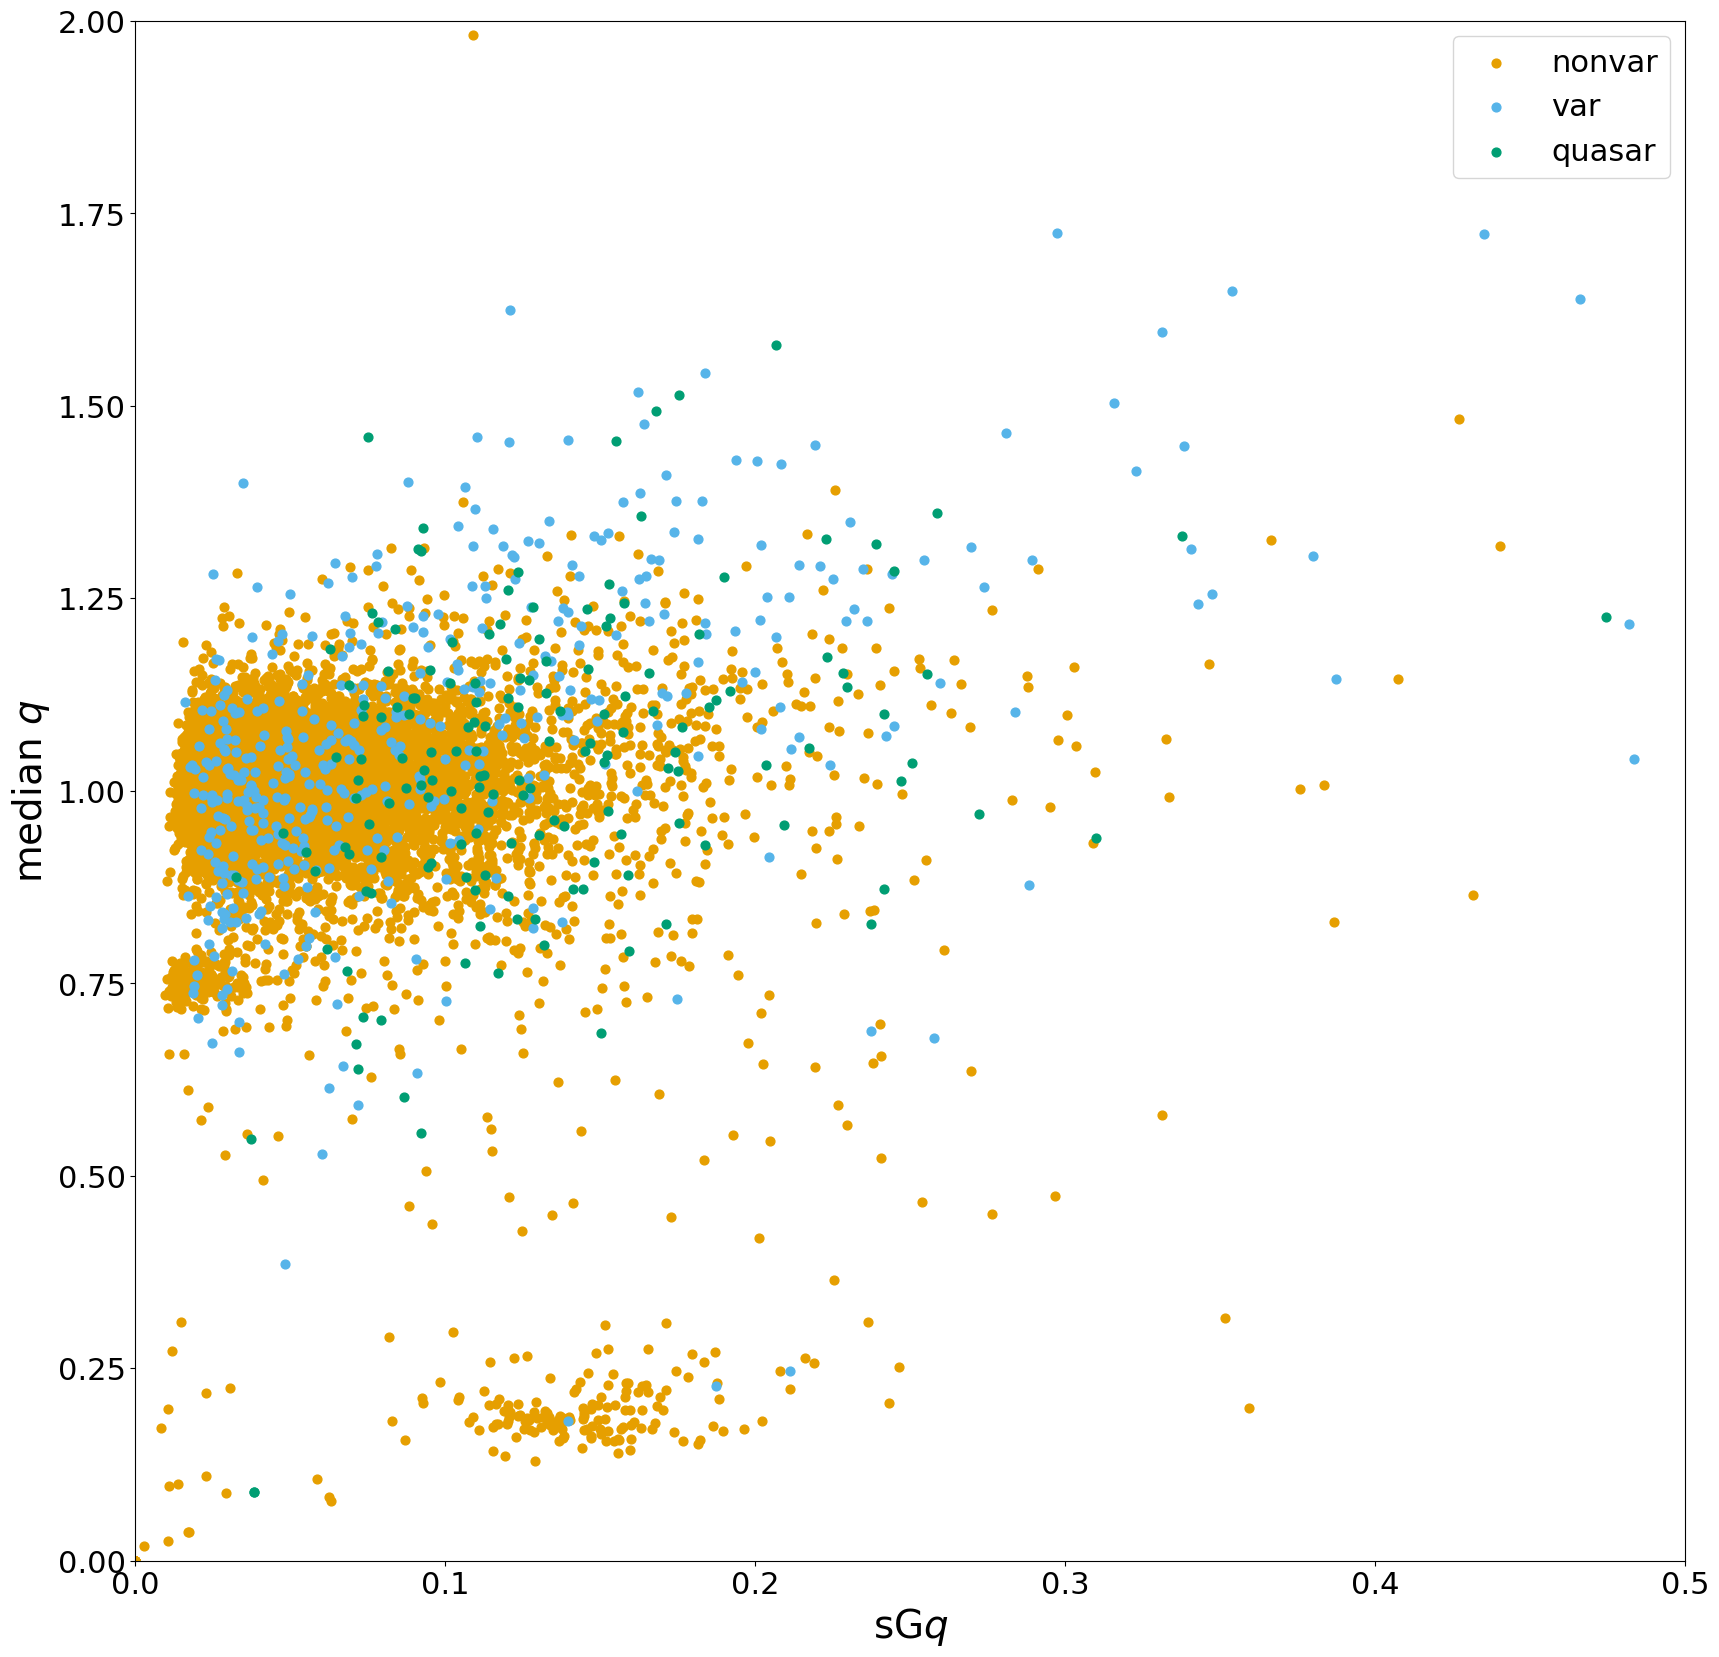

In [91]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGQ, MAX_SGQ)
plt.ylim(MIN_Q, MAX_Q)

plt.xlabel('sG$q$')
plt.ylabel('median $q$')

plt.scatter(nonvar_subset[SGQ_COLNAME], nonvar_subset[Q_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[SGQ_COLNAME],    var_subset[Q_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
plt.scatter(quasar_subset[SGQ_COLNAME], quasar_subset[Q_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

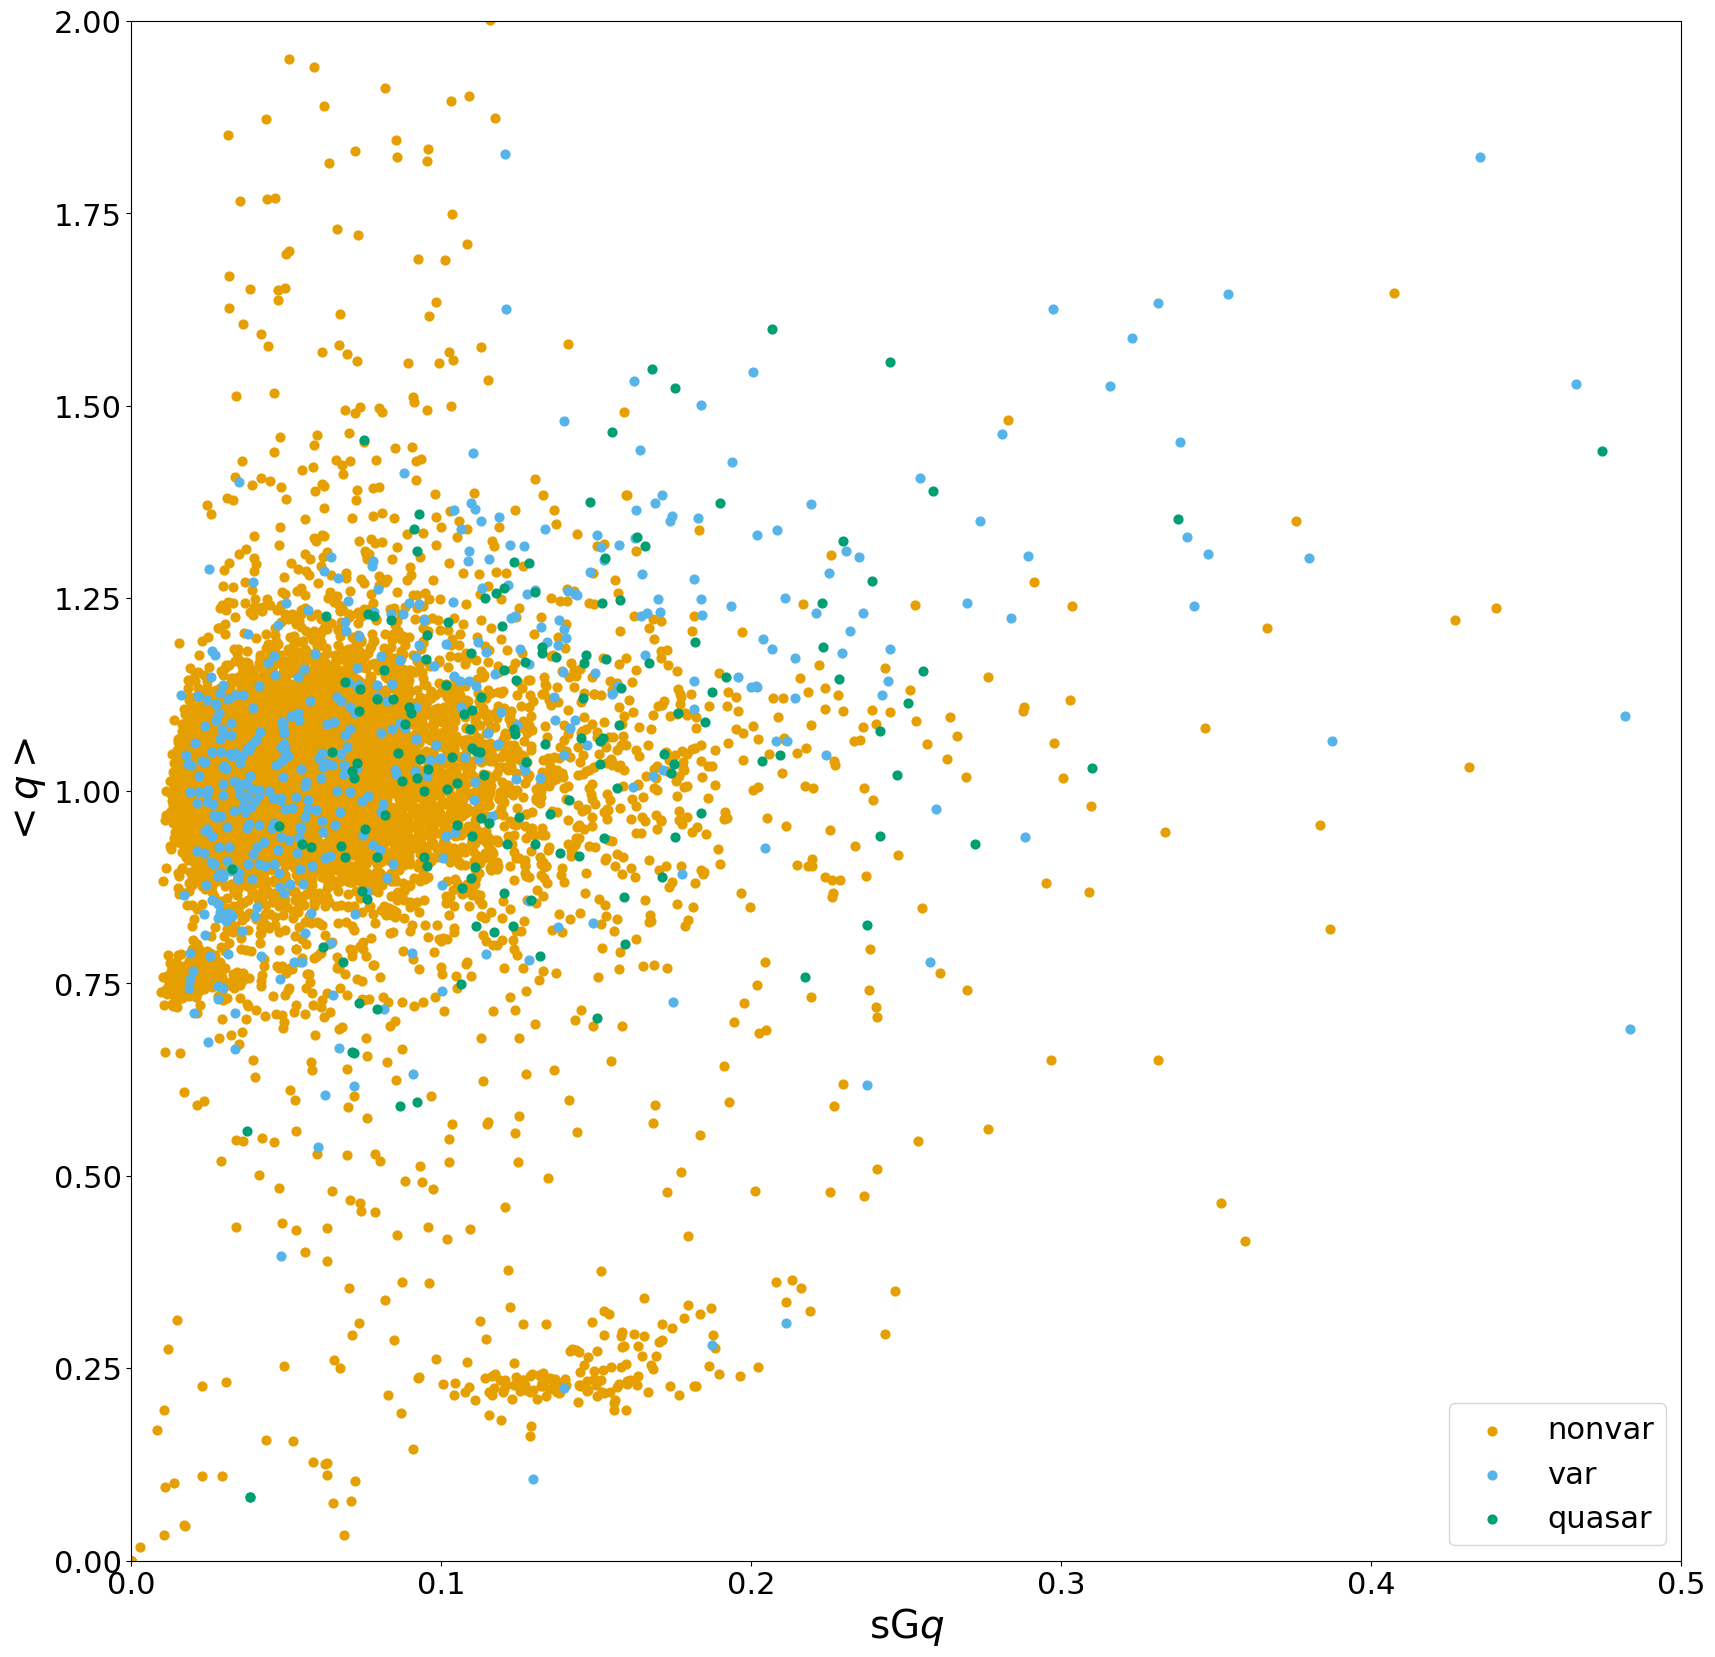

In [93]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGQ, MAX_SGQ)
plt.ylim(MIN_Q, MAX_Q)

plt.xlabel('sG$q$')
plt.ylabel('$<q>$')

plt.scatter(nonvar_subset[SGQ_COLNAME], nonvar_subset[Q_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[SGQ_COLNAME],    var_subset[Q_MEAN_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[SGQ_COLNAME], quasar_subset[Q_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()

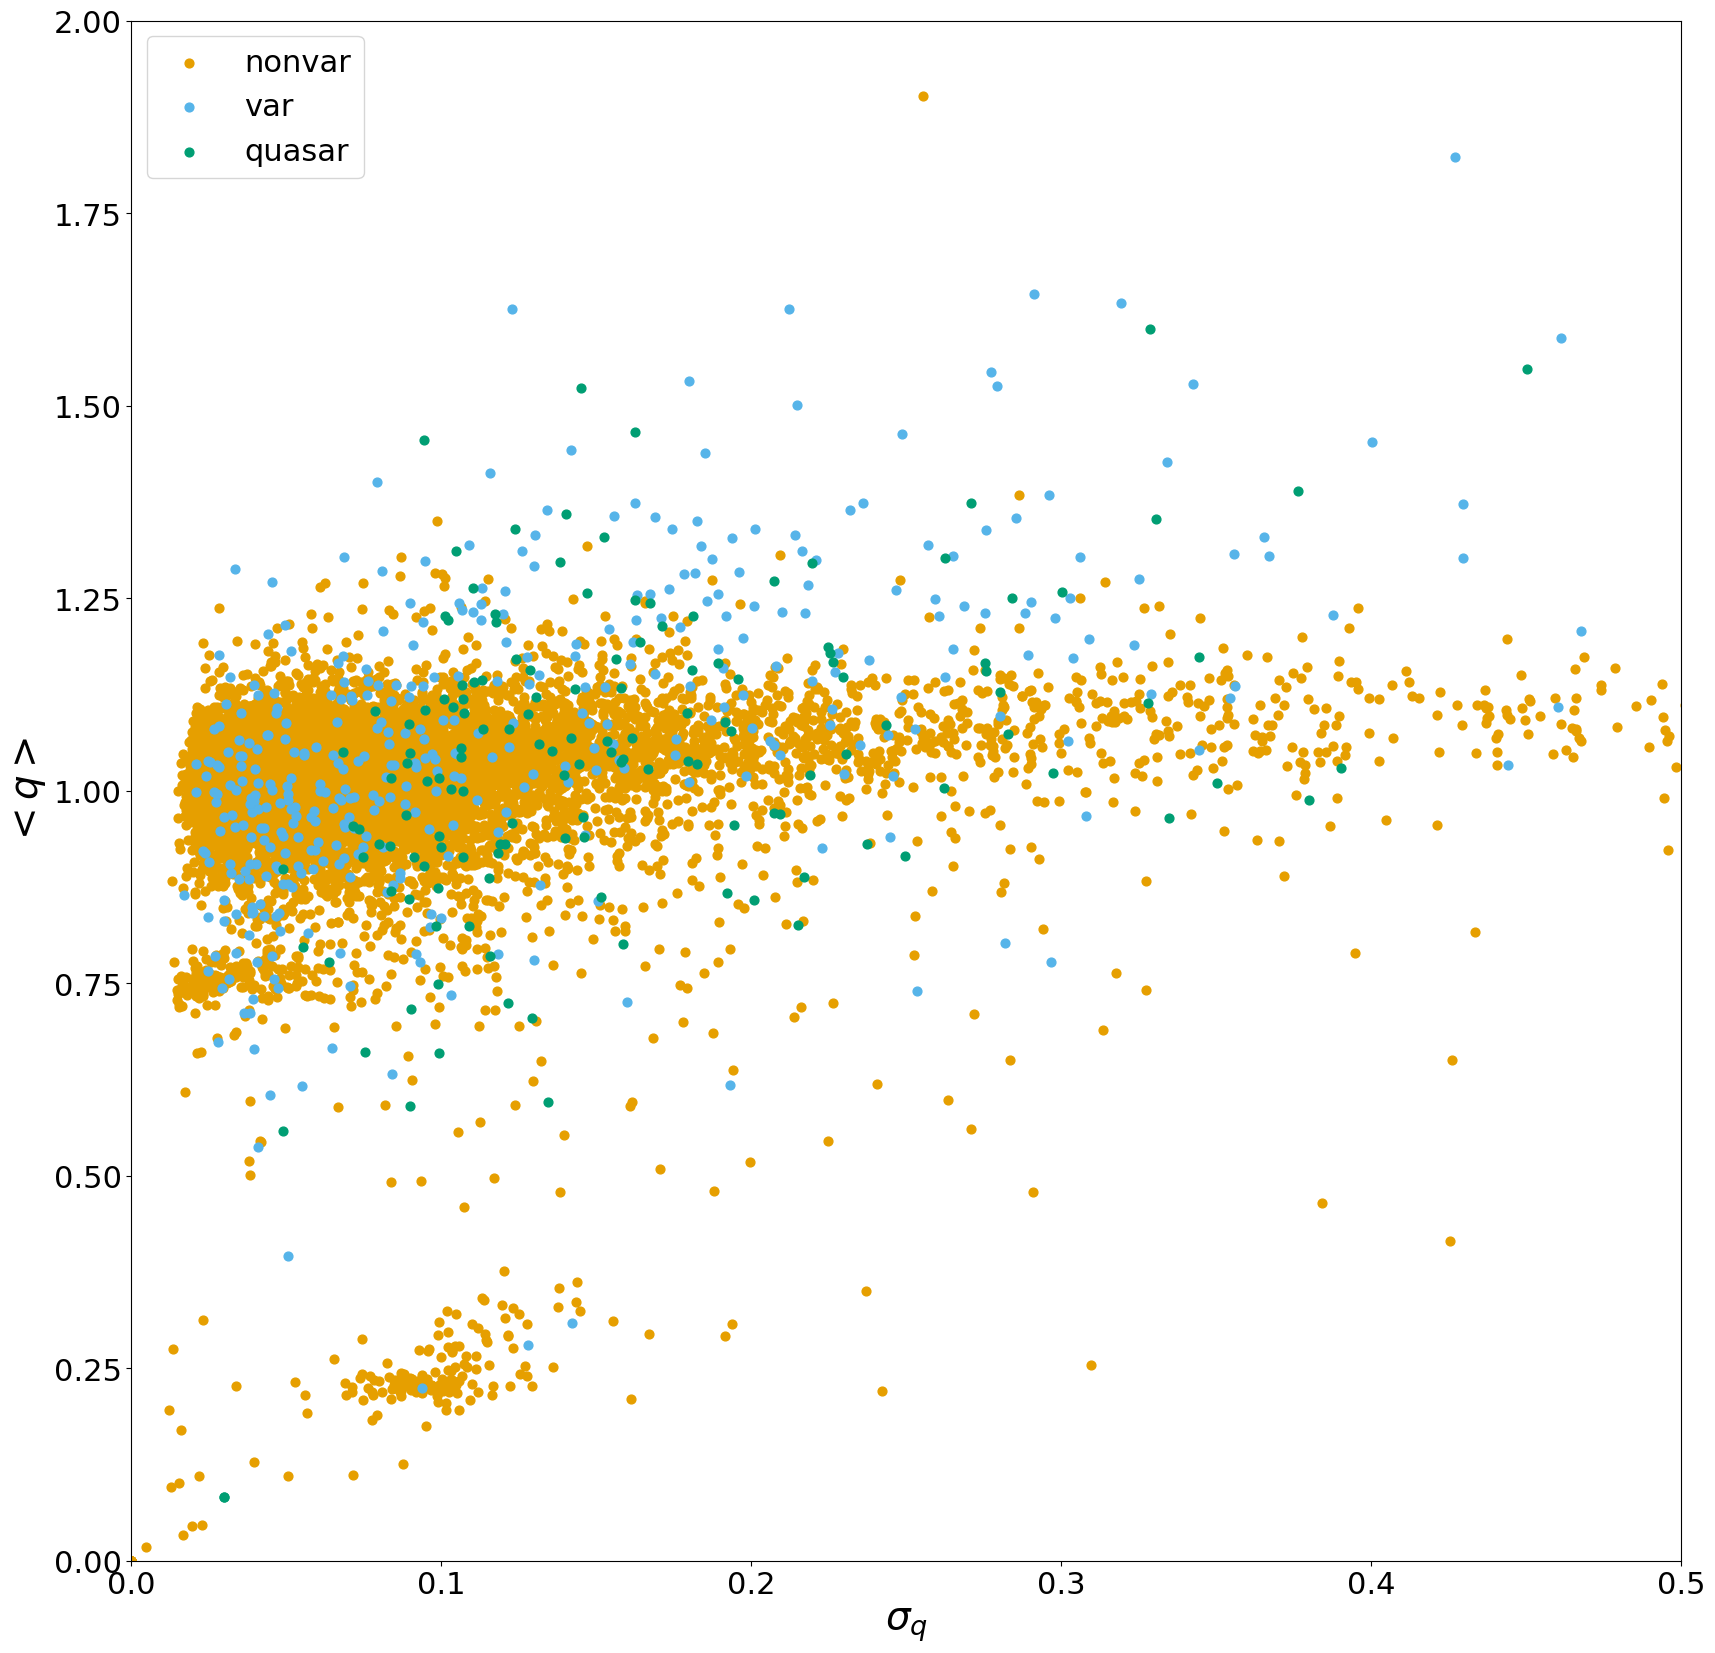

In [90]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGQ, MAX_SGQ)
plt.ylim(MIN_Q, MAX_Q)

plt.xlabel('$\\sigma_q$')
plt.ylabel('$<q>$')

plt.scatter(nonvar_subset[Q_STD_COLNAME], nonvar_subset[Q_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[Q_STD_COLNAME],    var_subset[Q_MEAN_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[Q_STD_COLNAME], quasar_subset[Q_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()

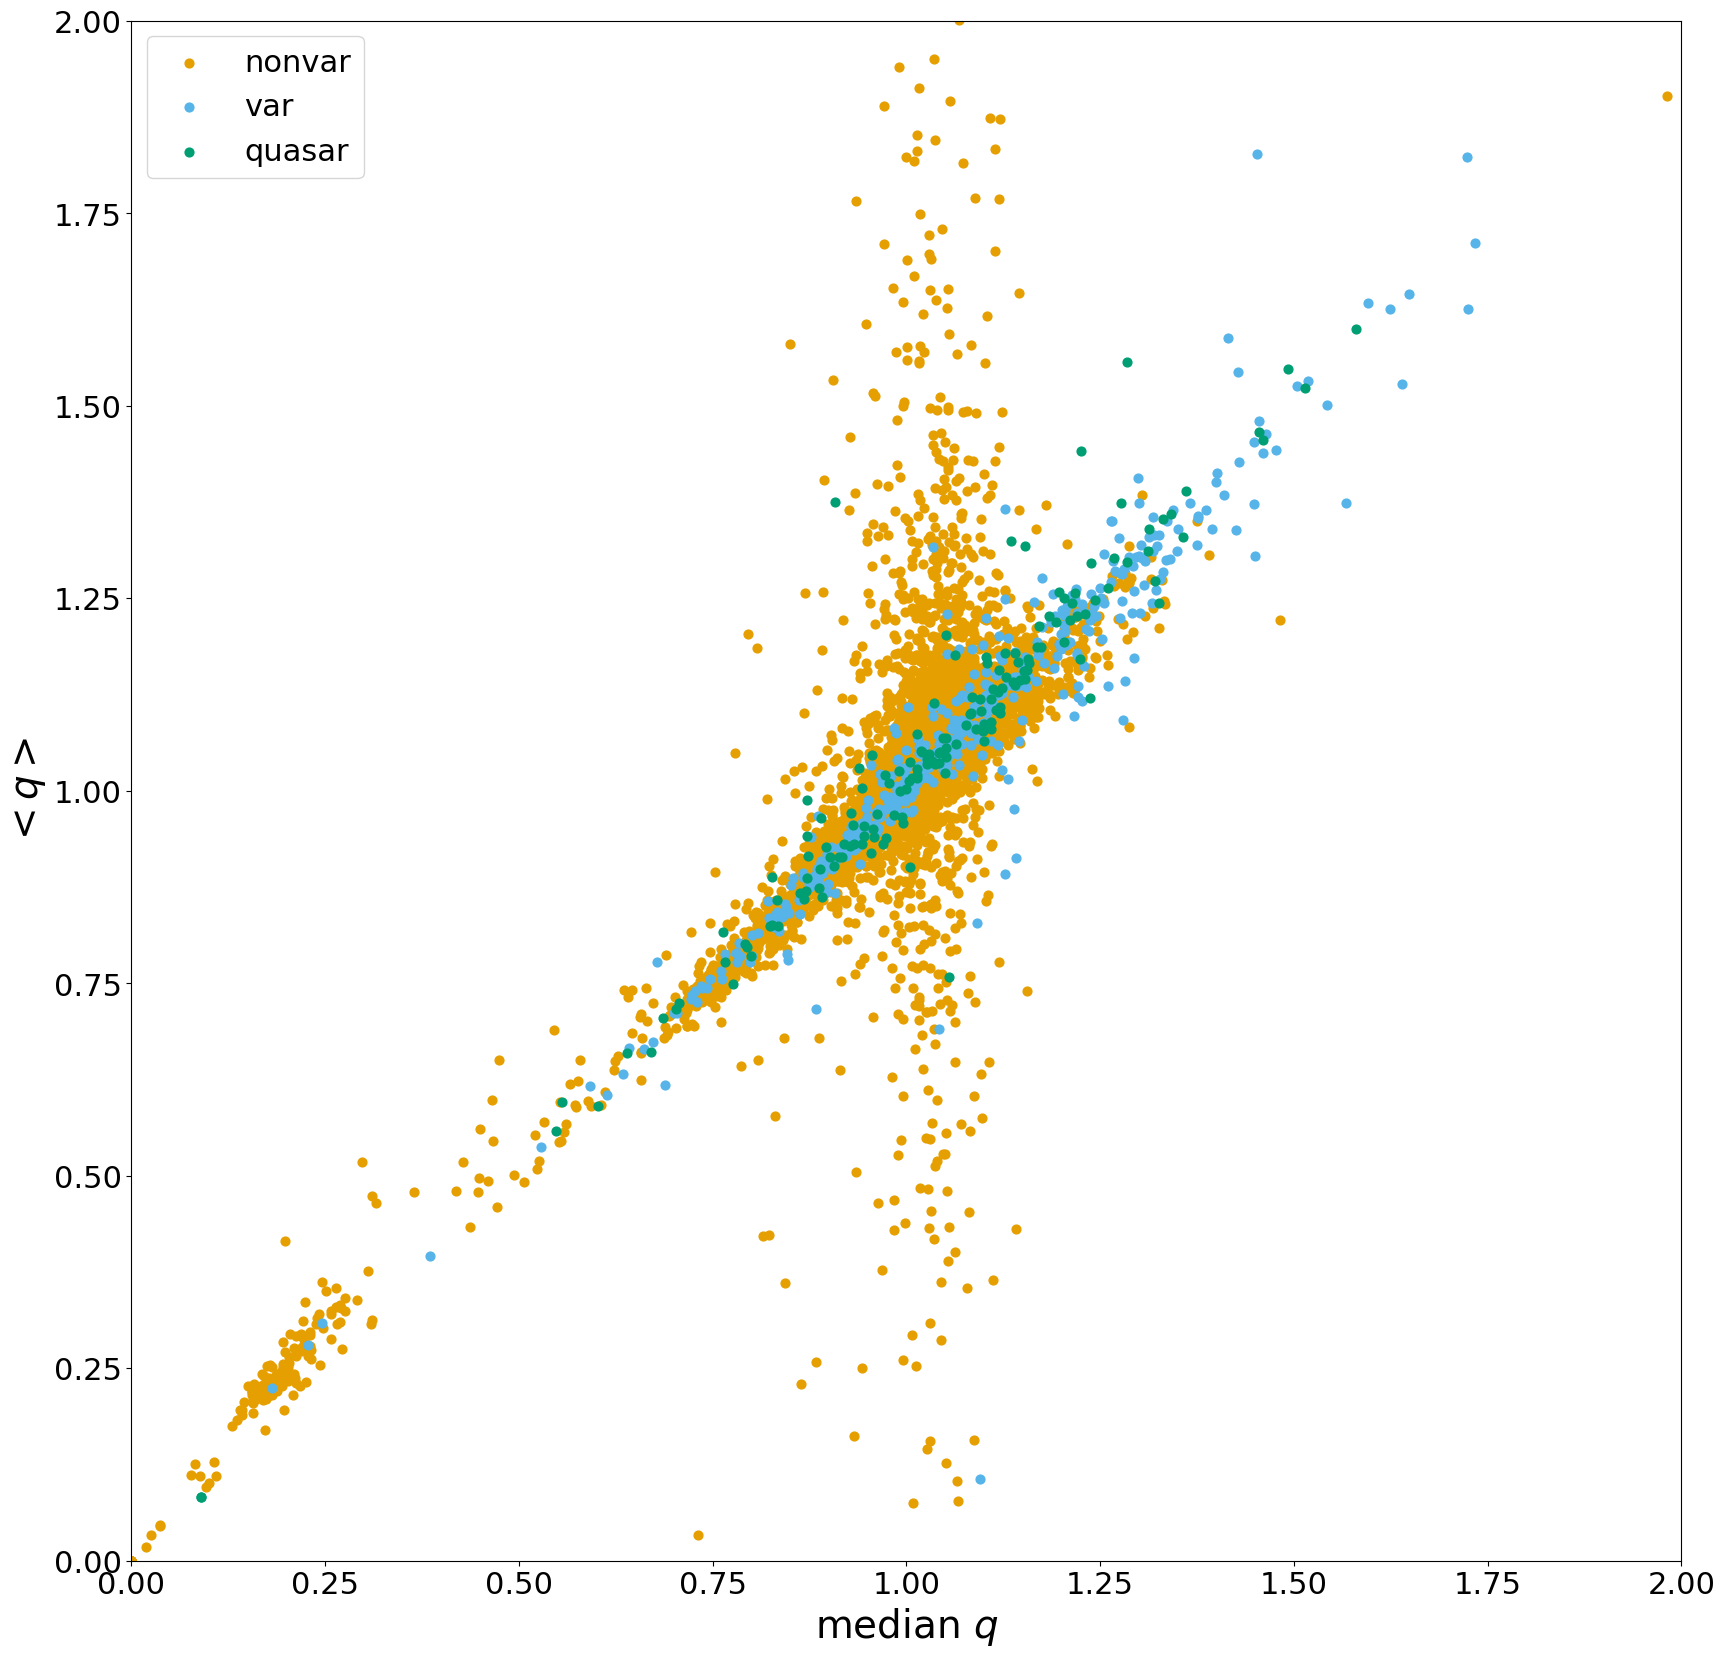

In [89]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_Q, MAX_Q)
plt.ylim(MIN_Q, MAX_Q)

plt.xlabel('median $q$')
plt.ylabel('$<q>$')

plt.scatter(nonvar_subset[Q_MEDIAN_COLNAME], nonvar_subset[Q_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[Q_MEDIAN_COLNAME],    var_subset[Q_MEAN_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[Q_MEDIAN_COLNAME], quasar_subset[Q_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()

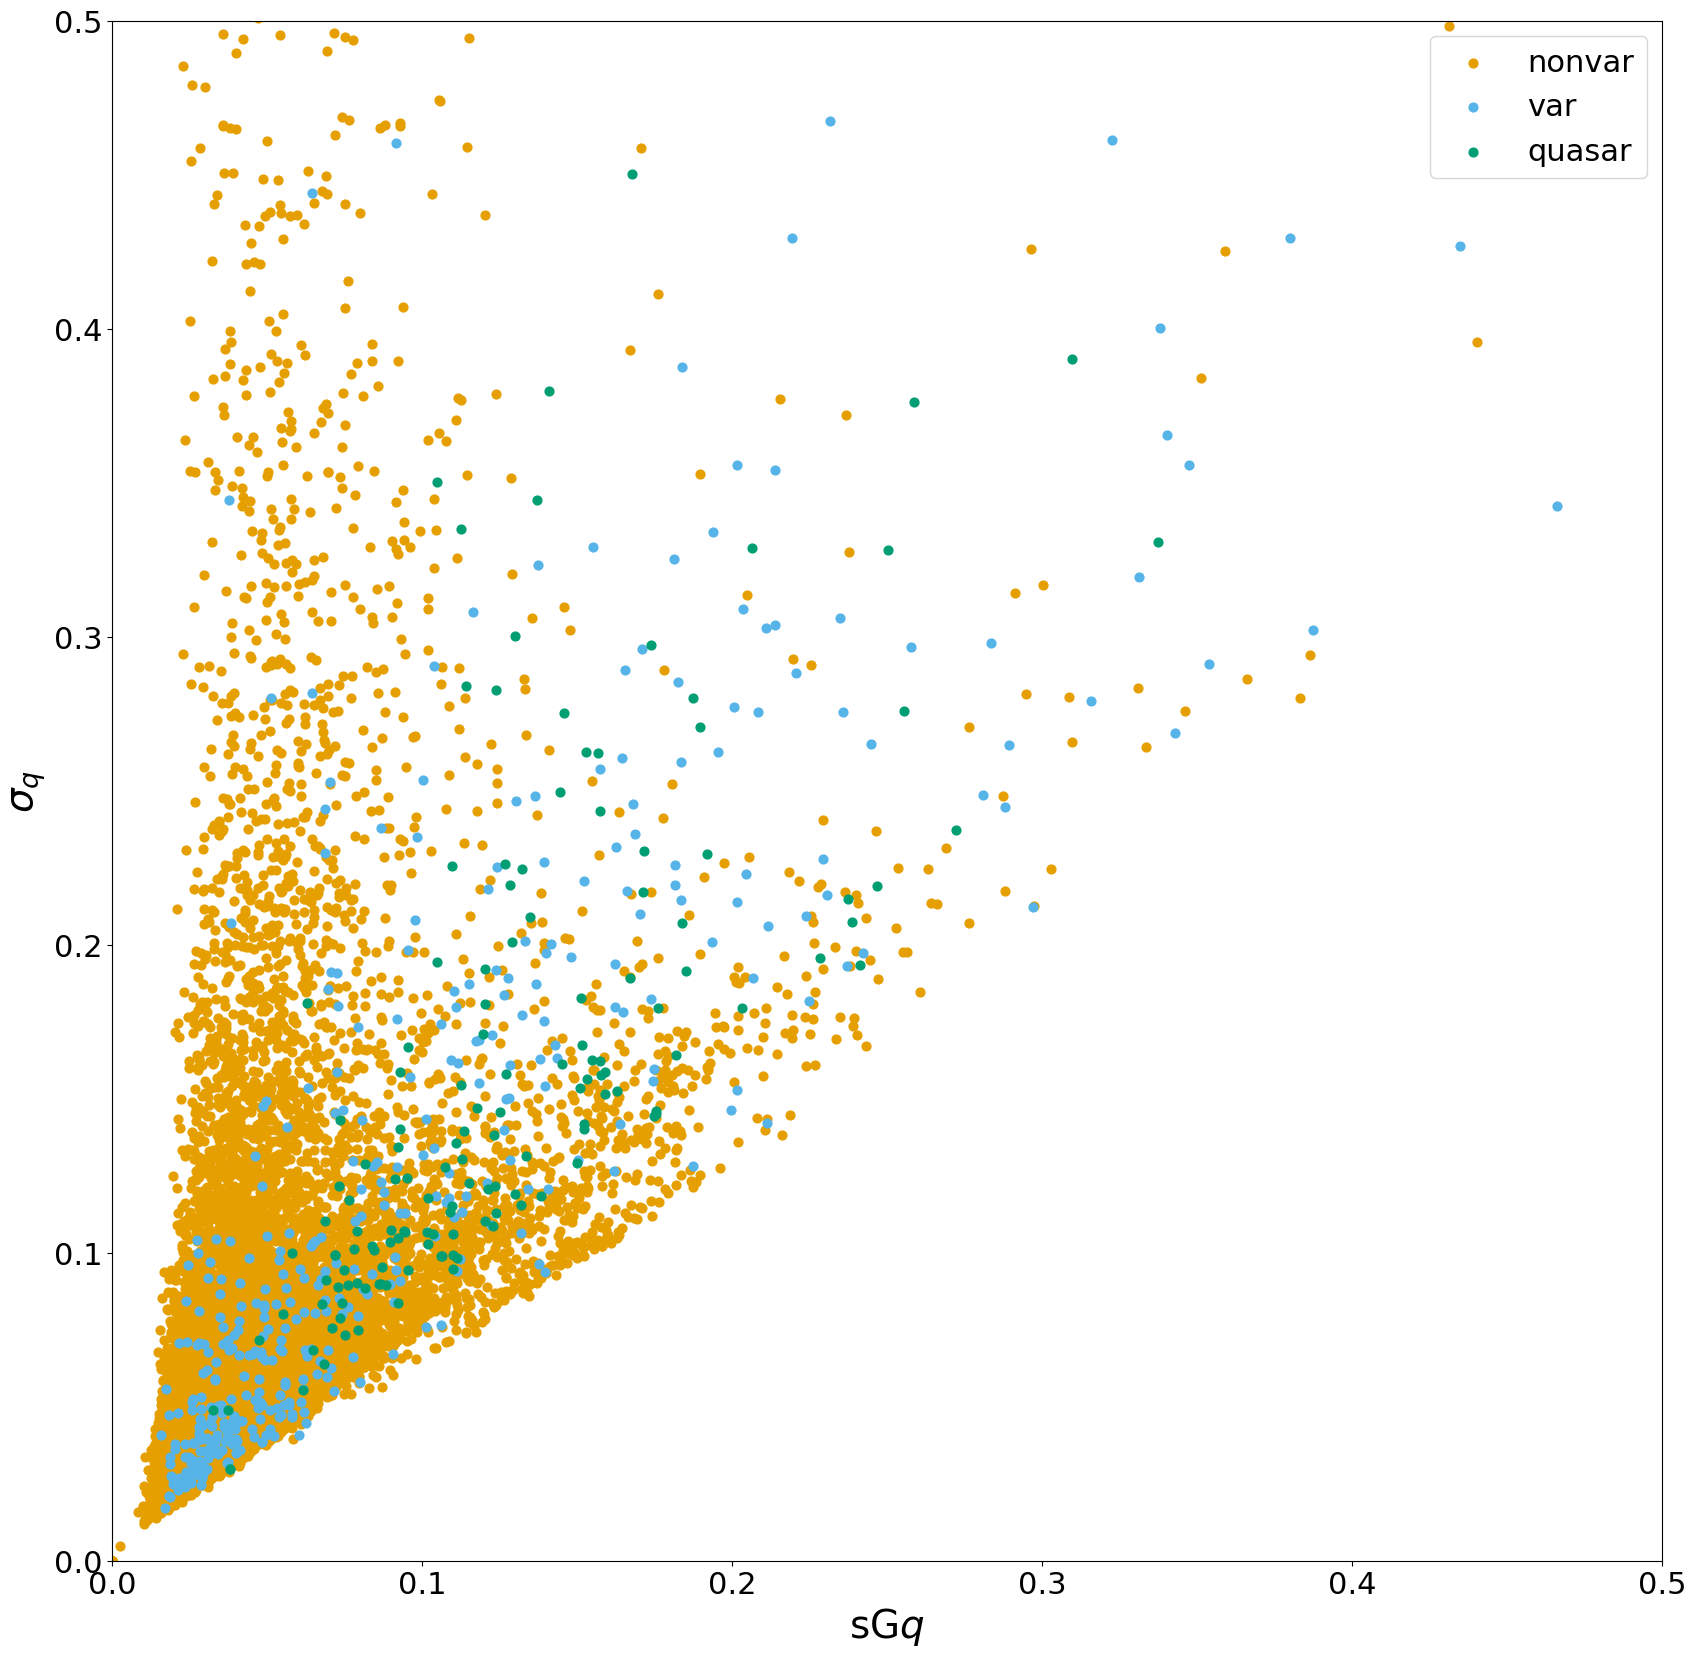

In [94]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGQ, MAX_SGQ)
plt.ylim(MIN_SGQ, MAX_SGQ)

plt.xlabel('sG$q$')
plt.ylabel('$\\sigma_q$')

plt.scatter(nonvar_subset[GSQ_COLNAME], nonvar_subset[Q_STD_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[GSQ_COLNAME],    var_subset[Q_STD_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[GSQ_COLNAME], quasar_subset[Q_STD_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()

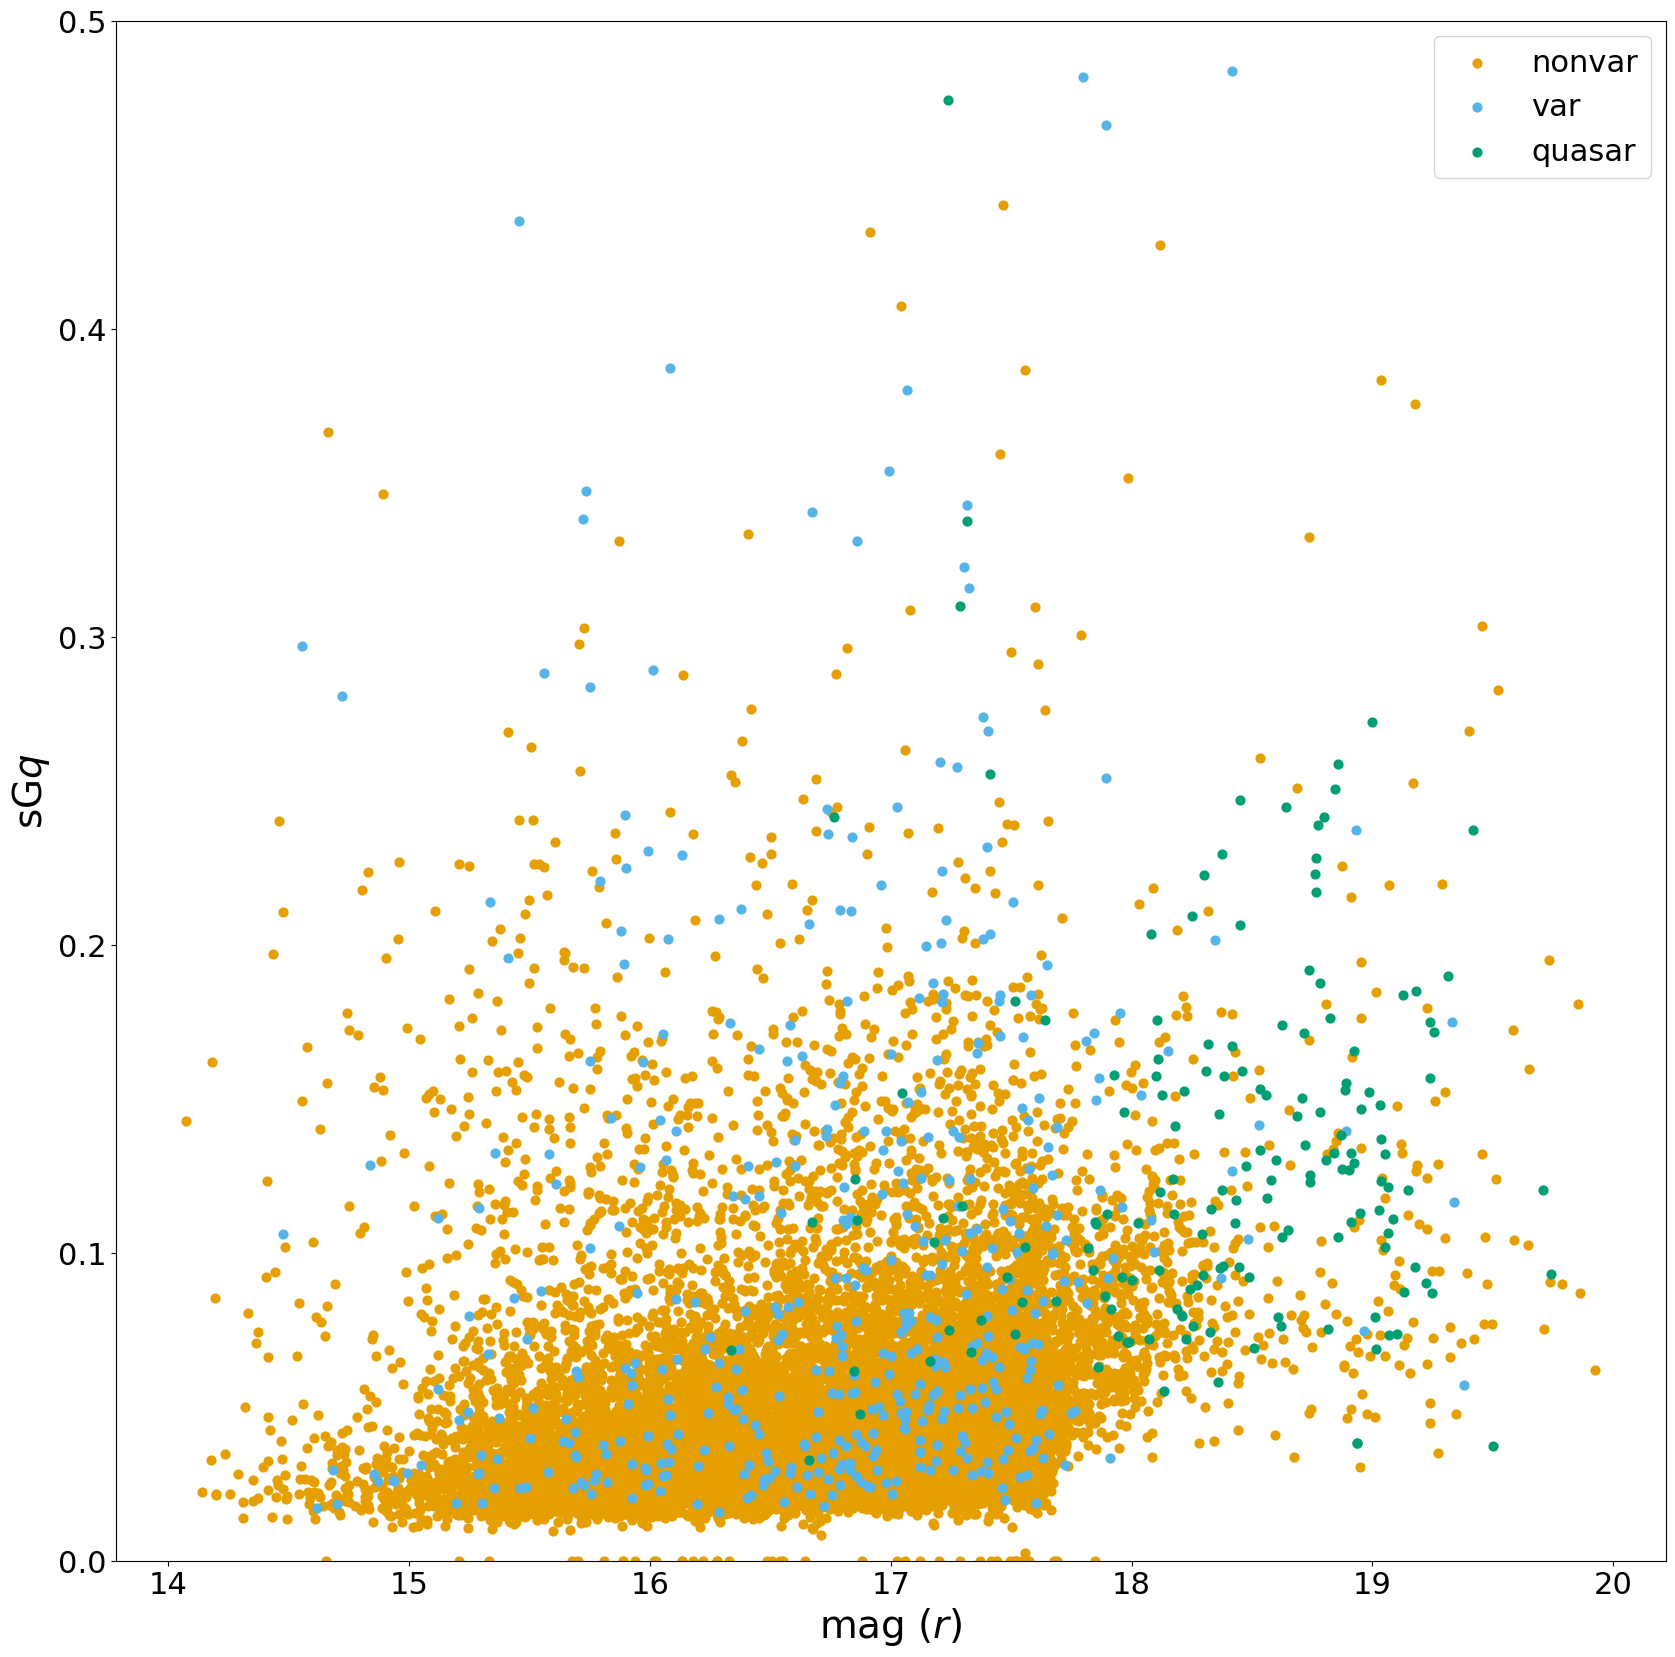

In [99]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_SGQ, MAX_SGQ)

plt.xlabel('mag ($r$)')
plt.ylabel('sG$q$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[GSQ_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[GSQ_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[GSQ_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()

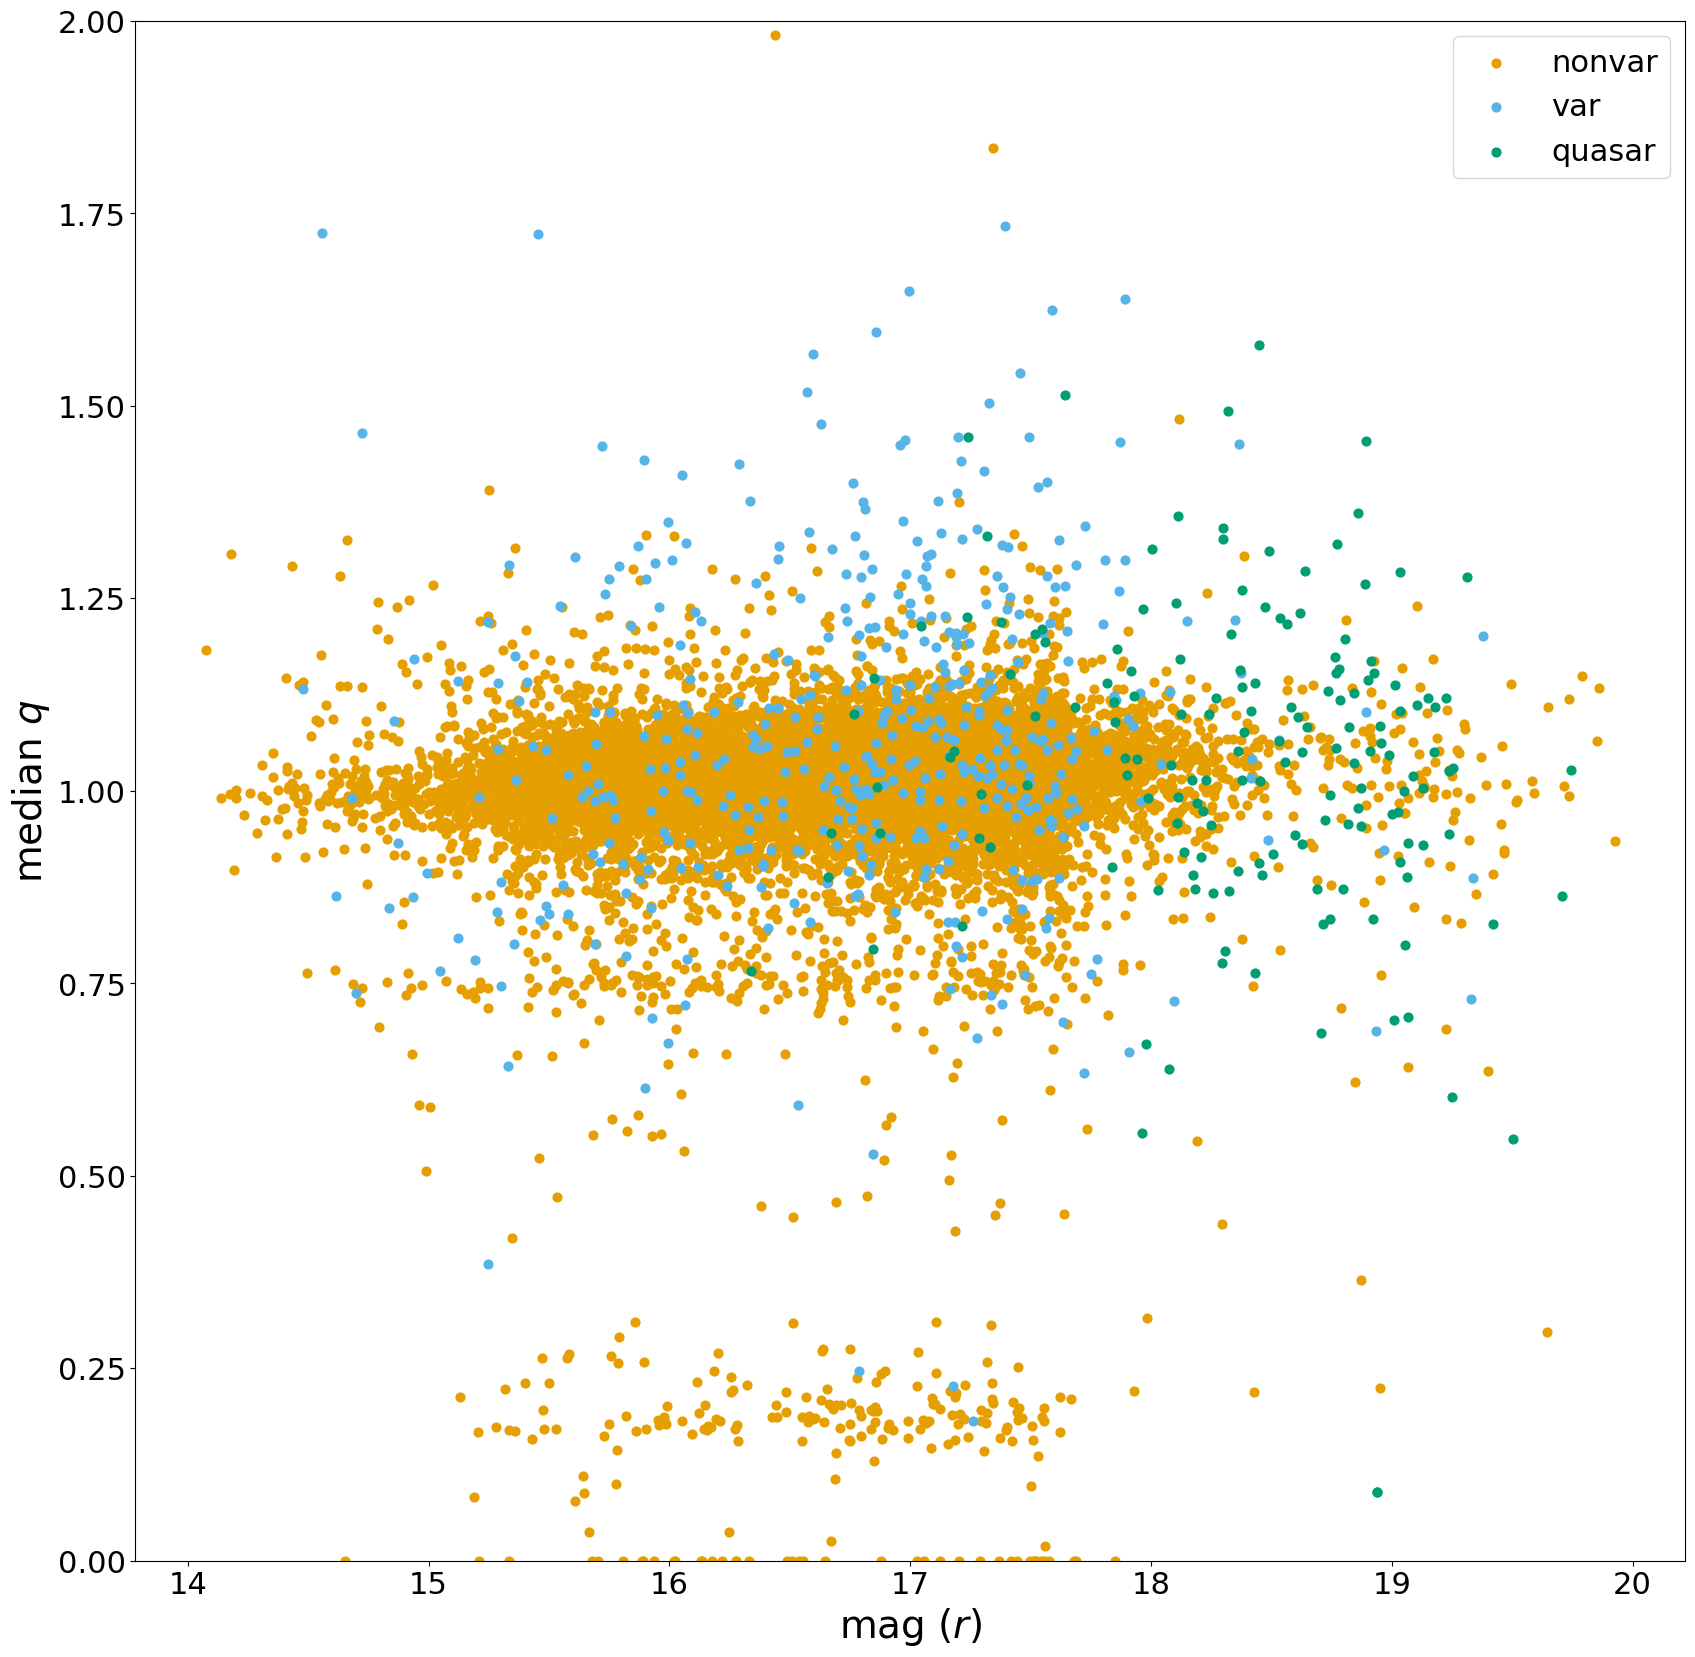

In [104]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_Q, MAX_Q)

plt.xlabel('mag ($r$)')
plt.ylabel('median $q$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[Q_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[Q_MEDIAN_COLNAME],    c=C_SKYBLUE, s=S, label='var')
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[Q_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')

plt.legend()
plt.show()